In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix

In [2]:
import pandas as pd #Pandas to load and handle the dataset
ds = pd.read_csv("./data/Plants_Dataset.csv")
ds = ds.to_numpy()

In [3]:
b, ds[:,0] = np.unique(ds[:,0], return_inverse=True)
print(ds)

[[3 654 38.4 ... 49.43 5.5 0.93]
 [3 413 22.2 ... 50.24 5.63 0.94]
 [3 610 31.2 ... 50.77 5.58 1.08]
 ...
 [1 648 22.7 ... 47.76 5.81 1.3]
 [1 595 31.5 ... 49.01 5.97 1.39]
 [1 528 23.4 ... 48.29 5.94 1.16]]


In [4]:
X= ds[:,1:]
print(X)

[[654 38.4 16.6 ... 49.43 5.5 0.93]
 [413 22.2 17.2 ... 50.24 5.63 0.94]
 [610 31.2 19.9 ... 50.77 5.58 1.08]
 ...
 [648 22.7 21.4 ... 47.76 5.81 1.3]
 [595 31.5 22.5 ... 49.01 5.97 1.39]
 [528 23.4 17.4 ... 48.29 5.94 1.16]]


In [5]:
y= ds[:,0]
print(y)


[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 1 1 1 1 1]


In [6]:
# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = ???

#Solution - I have explicitly strafified this set as well:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,random_state=2)


In [7]:
#Convert values to floats before standardizing, this is new code
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Standardize
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std

In [8]:
print(mean)

[6.07800000e+02 2.97366667e+01 1.99450000e+01 6.51333333e+00
 8.53000000e+01 4.41383333e+01 1.99208333e+01 8.46040000e+01
 2.82883333e+00 1.42083333e-01 5.57350833e+02 1.11178117e+03
 1.10340162e+04 1.67233933e+03 4.88453333e+01 5.79050000e+00
 1.05833333e+00]


In [9]:
#We need to store the best performance and the features that achieved them.
best_mean_f1 = 0
best_f1 = 0
best_f2 = 0
best_clf = ""

# We will be testing every combination of pairs of features 

for f1 in range(0,16):
    for f2 in range(0,16):
        
        # We want 2 features, not 1
        if f1 == f2:
            continue
        
        features_idx_to_use = [f1,f2]
        
        clf = SGDClassifier(alpha=0.001, max_iter=100, random_state=2)
        clf.fit(X_train[:,features_idx_to_use], y_train)
        
        # Return the predictions for the 3-Fold crossvalidation
        y_predicted = cross_val_predict(clf, X_train[:,features_idx_to_use],y_train, cv=3)
        
        # Construct the confusion matricies
        conf_mat_train = confusion_matrix(y_train, y_predicted)
        
        # Print out the recall, precision and F1 scores
        # There will be a value for each class
        # CV Train
        #print("CV Train:",f1,":",f2," - ", recall_score(y_train,y_predicted,average=None))
        #print("CV Train:",f1,":",f2," - ",precision_score(y_train,y_predicted,average=None))
        #print("CV Train f1scores:",f1,":",f2," - ",f1_score(y_train,y_predicted,average=None))

        current_f1 = np.mean(f1_score(y_train,y_predicted,average=None))
        if current_f1 > best_mean_f1:
            best_f1 = f1
            best_f2 = f2
            best_mean_f1 = current_f1
            best_clf = clf
            

#RE do the calculations with our selected best options as final
features_idx_to_use = [f1,f2]

clf = SGDClassifier(alpha=0.001, max_iter=100, random_state=1)
clf.fit(X_train[:,features_idx_to_use], y_train)

# Return the predictions for the 3-Fold crossvalidation
y_predicted = cross_val_predict(clf, X_train[:,features_idx_to_use],y_train, cv=3)

# Construct the confusion matricies
conf_mat_train = confusion_matrix(y_train, y_predicted)

# Print out the recall, precision and F1 scores
# There will be a value for each class
# CV Train
print("CV Train recall:",best_f1,":",best_f2," - ", recall_score(y_train,y_predicted,average=None))
print("CV Train precision:",best_f1,":",best_f2," - ",precision_score(y_train,y_predicted,average=None))
print("CV Train f1scores:",best_f1,":",best_f2," - ",f1_score(y_train,y_predicted,average=None))

        


CV Train recall: 1 : 15  -  [0.26315789 0.25       0.5        0.78947368]
CV Train precision: 1 : 15  -  [0.625      0.16666667 0.5        0.57692308]
CV Train f1scores: 1 : 15  -  [0.37037037 0.2        0.5        0.66666667]


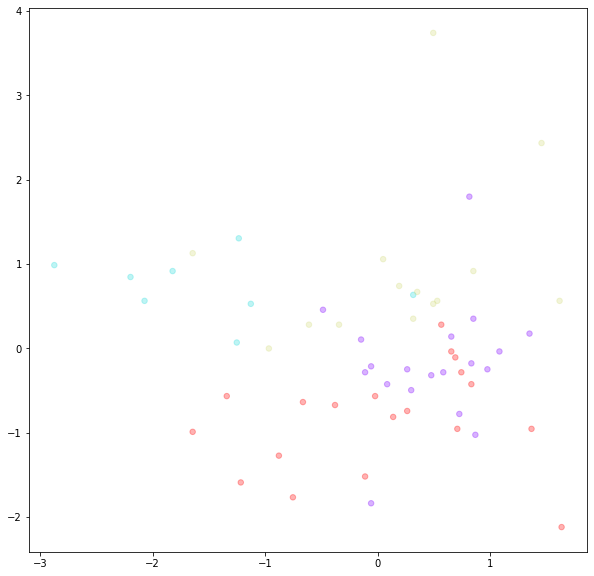

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X_train[:,best_f1], X_train[:,best_f2], c=y_train, cmap='rainbow', alpha=0.3, s=30)   

Test: [0.         1.         0.8        0.83333333]
Test: [0.         0.75       0.4        0.83333333]
Test: [0.         0.85714286 0.53333333 0.83333333]
['A', 'B', 'C', 'D']


C:\Users\ioemaster\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


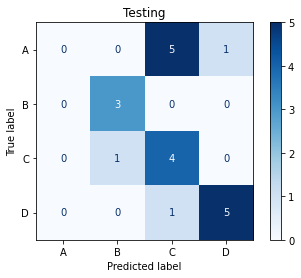

In [11]:
#We dont have a "bunch target_name"
#So make an equivalent...
target_names = ['A', 'B', 'C', 'D']

# Now we need to test our classifier using the test set.
# Recall that we standardised the data - we need to do the same with the stored
# Mean and standard deviation from the training set.

X_test = (X_test - mean) / std

y_test_predicted = best_clf.predict(X_test[:,[best_f1, best_f2]])
conf_mat_test = confusion_matrix(y_test, y_test_predicted)

fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay.from_estimator(best_clf, X_test[:,[best_f1, best_f2]], y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,ax=ax)
ax.set_title('Testing')

# Test
print("Test:",recall_score(y_test,y_test_predicted,average=None))
print("Test:",precision_score(y_test,y_test_predicted,average=None))
print("Test:",f1_score(y_test,y_test_predicted,average=None)) 

print(target_names)
        

In [12]:
print(y_test)

[2. 3. 0. 1. 1. 1. 2. 3. 3. 2. 0. 0. 3. 0. 0. 2. 2. 3. 0. 3.]


In [13]:
#y_score = best_clf.decision_function(X_test[:,[best_f1, best_f2]])

# We need to format the y_test into a n_samples x 2 binary array
# that indicates class membership
##from sklearn import preprocessing
#y_test_bin = preprocessing.label_binarize(y, classes=[0, 1])
#fpr = dict()
#tpr = dict()
#roc_auc = dict()
#fpr, tpr, _ = roc_curve(y_test, y_score)
#roc_auc = auc(fpr, tpr)

#print("AUC:", roc_auc)

In [14]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_test[:, best_f1].min() - 1, X_test[:, best_f1].max() + 1
y_min, y_max = X_test[:, best_f2].min() - 1, X_test[:, best_f2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


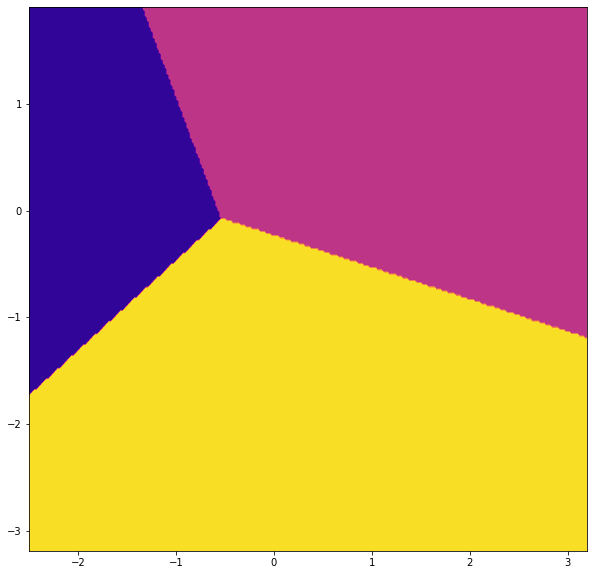

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = best_clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
cs = ax.contourf(xx, yy, Z,cmap=plt.get_cmap('plasma'))

In [22]:
print(zip(best_clf.classes_, colors))

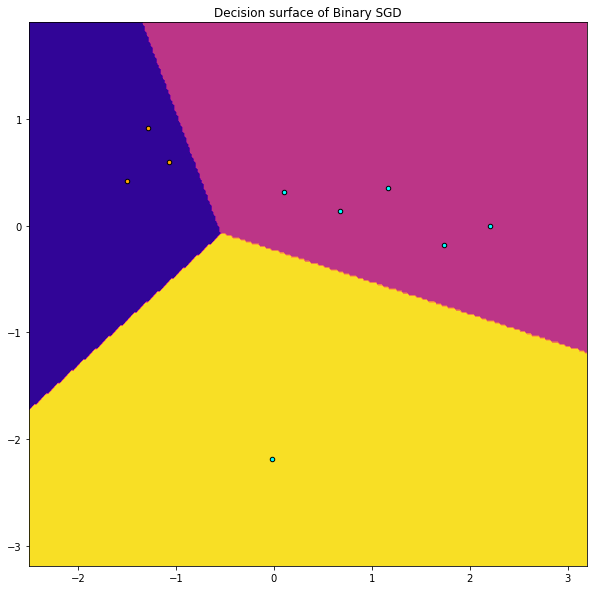

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = best_clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
cs = ax.contourf(xx, yy, Z,cmap=plt.get_cmap('plasma'))

colors = ['cyan','orange']
# Plot also the training points
for i, color in zip(best_clf.classes_, colors):
    idx = np.where(y_test == i)
    i=int(i)
    ax.scatter(X_test[idx, best_f1], X_test[idx, best_f2], c=color, label=target_names[i],
                cmap=plt.get_cmap('plasma'), edgecolor='black', s=20)
ax.set_title("Decision surface of Binary SGD")
ax.axis('tight')

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = best_clf.coef_
intercept = best_clf.intercept_

# Lets make a function to plot the hyperplanes used by the SVM for 
# Classification.

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
              ls="--", color=color)

plot_hyperplane(0, "red")